**Princess Ibtihaj**
    
Fall 2024
    
CS 251 / 252: Data Analysis and Visualization
    
Project 4: Principal Component Analysis

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
import pca
    
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 4: Eigenletters â€” PCA on images of hand-drawn letters\
    
Here, you will implement an algorithm that uses eigenvectors to reconstruct images based on how the deviate from the mean (i.e. average) image in a library of images. The original algorithm was applied to human faces (here is a [link](https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf) to original paper), but we are going to apply it to hand-written letters from the EMNIST data set ([link](https://www.nist.gov/itl/products-and-services/emnist-dataset))

### 4a. Load in the dataset of images of a letter
    
Run the code below to load in 4,800 images of a single letter (including lower and upper case versions). You can download the file for each letter separately. Change the letter to whichever letter you want (and file you downloaded).

In [100]:
import numpy as np

letter = 'b' 
letter_imgs = np.load(f'data/emnist_letter_{letter}.npy')
    
print(f'There are {letter_imgs.shape[0]} letters. There should be 4800.')
print(f'Shape of images is are {letter_imgs.shape} letters. It should be (4800, 28, 28).')

There are 4800 letters. There should be 4800.
Shape of images is are (4800, 28, 28) letters. It should be (4800, 28, 28).


### 4b. Look at the letter data
    
In the cell below, fill in the function to create a 12x10 subplots grid of plots (*12 rows, 10 columns*). For showing the image, use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html):
    
Run the function to create the plot of the letters below, with the title \"Original\".
    
**Note:**
- When you call `imshow`, add these optional parameters to create black-on-white images: `cmap='gray'`, `vmin=0`, and `vmax=255`
- Turn off the x and y ticks (they just add clutter).

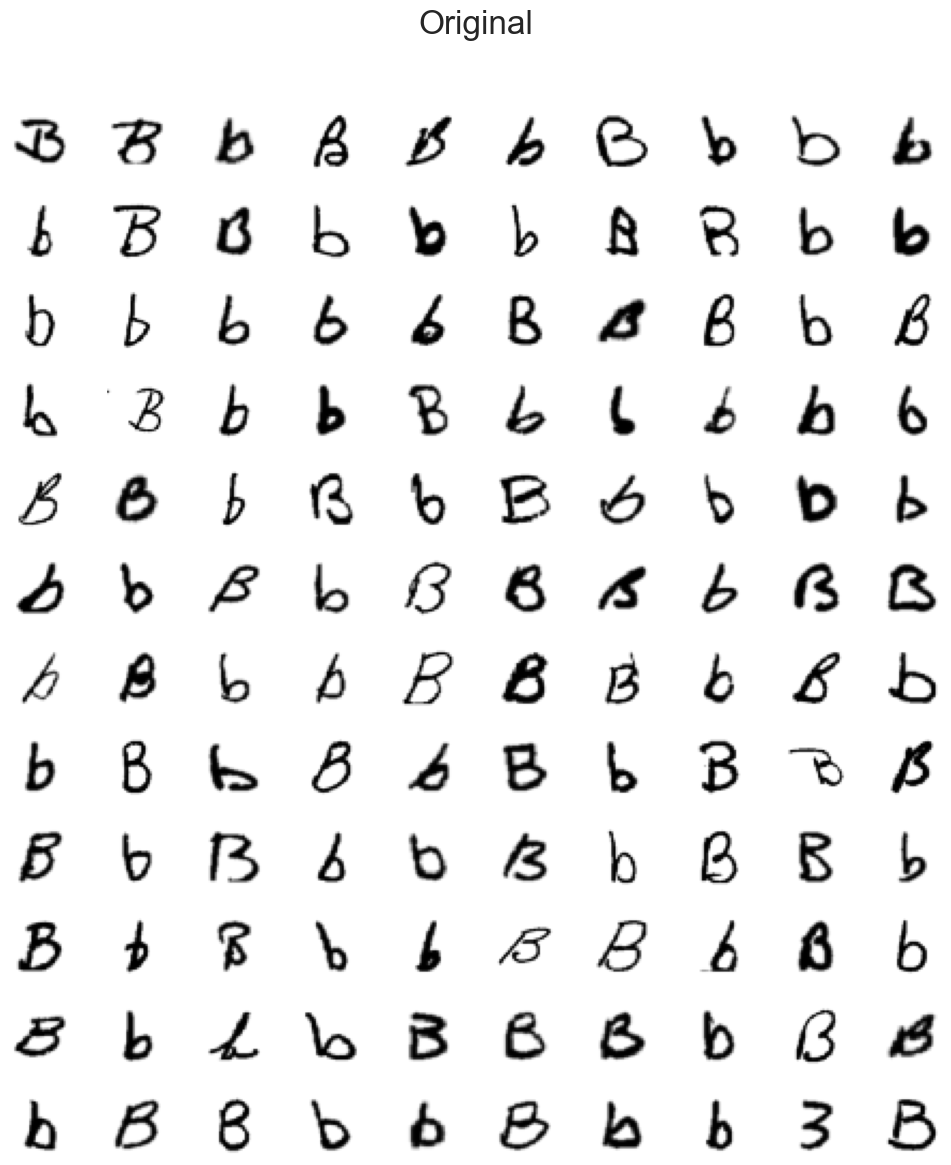

In [101]:
def plot_letter( letter_imgs, title ):
    "Creates a 12x10 grid of grayscale letter images."
"Parameters:"
"-----------"
"letter_imgs: ndarray. shape=(N, img_y, img_x)."
"Grayscale images to show."
"title: string"
"Title to display above all the subplots"

def plot_letter_grid(letter_imgs):
    fig, axes = plt.subplots(12, 10, figsize=(10, 12))
    fig.suptitle("Original", fontsize=24)

    for i, ax in enumerate(axes.flat):
        ax.imshow(letter_imgs[i], cmap='gray', vmin=0, vmax=255)
        ax.axis('off')  

    plt.tight_layout(rect=[0, 0, 1, 0.97])  
    plt.show()

plot_letter_grid(letter_imgs)

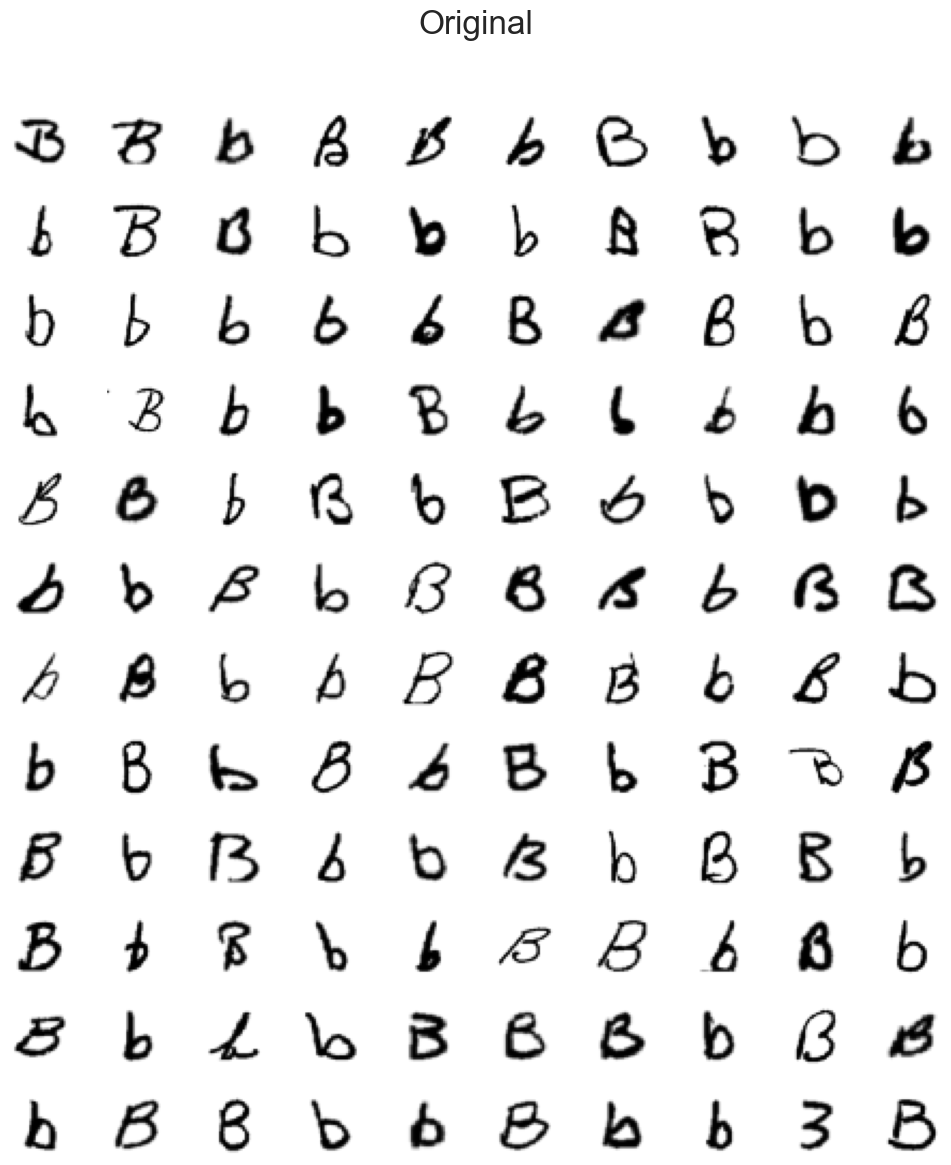

In [95]:
# Your code that calls plot_letter
plot_letter_grid(letter_imgs)

### 4c. Visualize the \"mean letter\"
    
Take the mean of the images and show it below.
    
**Note:** Use the same `cmap`, `vmin`, and `vmax` parameters as above and turn off x and y tick marks.

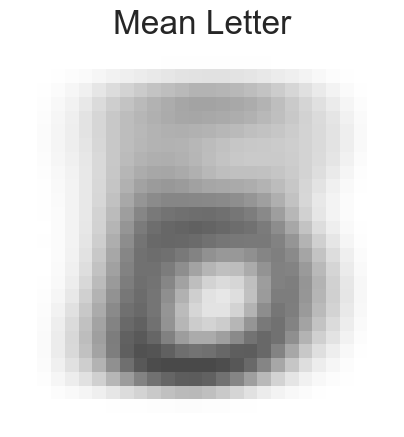

In [96]:
# Your code here"
mean_letter = np.mean(letter_imgs, axis=0)

plt.figure(figsize=(5, 5))
plt.imshow(mean_letter, cmap='gray', vmin=0, vmax=255)
plt.title("Mean Letter")
plt.axis('off') 
plt.show()


### 4d. Preprocess letter data
    
In the letter dataset, each hand-written letter is a sample and each pixel is a variable. Currently, the latter data has shape = `(4800, 28, 28)` or $N = 4800$ samples and $M = 28*28 = 784$ pixels. To run PCA, we'll need to \\\"unravel\\\" each row of pixels and glue them into one big vector so that the shape = `(4800, 28*28)` = `(4800, 784)`. This will make a standard matrix and should work with your PCA code.

    
In the following cell, reshape the letter data **without hardcoding** ANY of (4800, 28*28)!

In [102]:
# Your reshape code here
N, H, W = letter_imgs.shape  
letter_imgs_reshaped = letter_imgs.reshape(N, H * W)  

print(f"Reshaped letter data to: {letter_imgs_reshaped.shape}") 


Reshaped letter data to: (4800, 784)


### 4e. Perform PCA on preprocessed letter data
    
Create pandas DataFrame object that holds the letter data then run PCA on the letter dataset. The header names of consecutive integers `0, 1, ..., 783` are fine. For the `vars` parameter in the `fit` method, pass in a Python list of ints (`0, 1, ..., 783`).
    
**Notes:**
- This is not a \"toy\" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.
- When running the PCA, do not normalize the data. We do not want to treat each pixel as a separate feature.

In [103]:
# Your code here
import time

pca_model = pca.PCA(data=letter_df) 
vars_list = list(range(letter_imgs_reshaped.shape[1]))  

start_time = time.time()
pca_model.fit(vars=vars_list)
end_time = time.time()

print(f"PCA processing time: {end_time - start_time:.2f} seconds")

PCA processing time: 0.40 seconds


### 4f. Make letter PCA elbow plot
    
Make an elbow plot of the PCA results. Show **show only a reasonable number of PCs** to focus on the curve before it plateaus.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


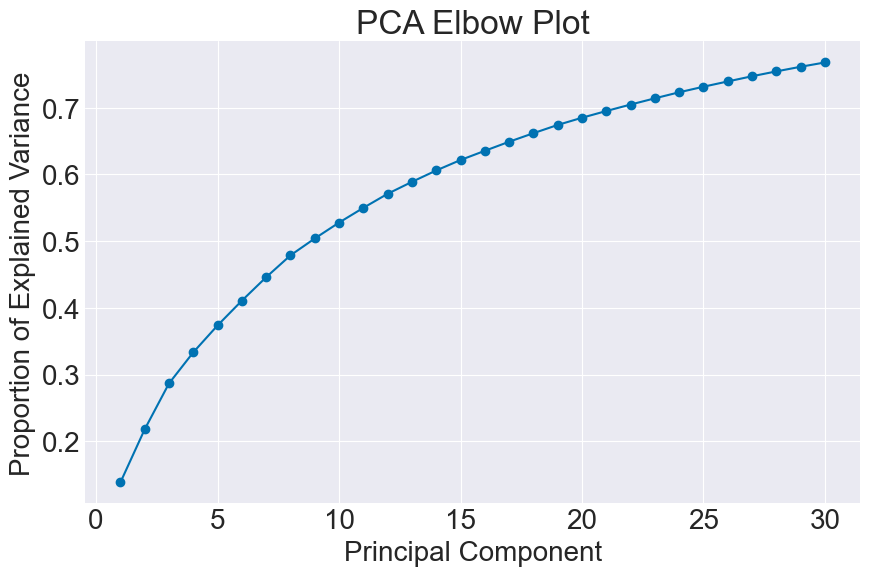

In [104]:
# elbow plot code here
eigenvalues = pca_model.get_eigenvalues()

pca_model.compute_prop_var(eigenvalues)  

explained_variance = pca_model.prop_var

num_pcs = min(30, len(explained_variance))  
pcs = range(1, num_pcs + 1)

plt.figure(figsize=(10, 6))
plt.plot(pcs, explained_variance[:num_pcs], marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid(True)
plt.show()

### 4g. Reconstruct letters using the principal components
    
Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 20%
- 50%
- 95%
    
Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(4800, 28, 28)`.
3. Use `plot_letter` to plot the reconstructed 1st 120 letters with each of the variance numbers above.
    
**There should be 3 12x10 plots below**

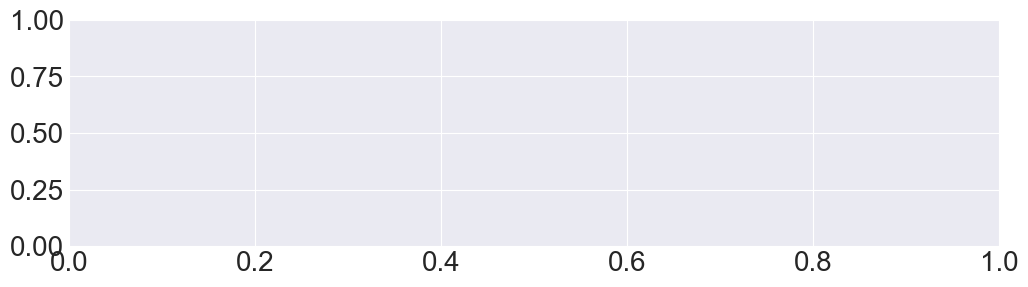

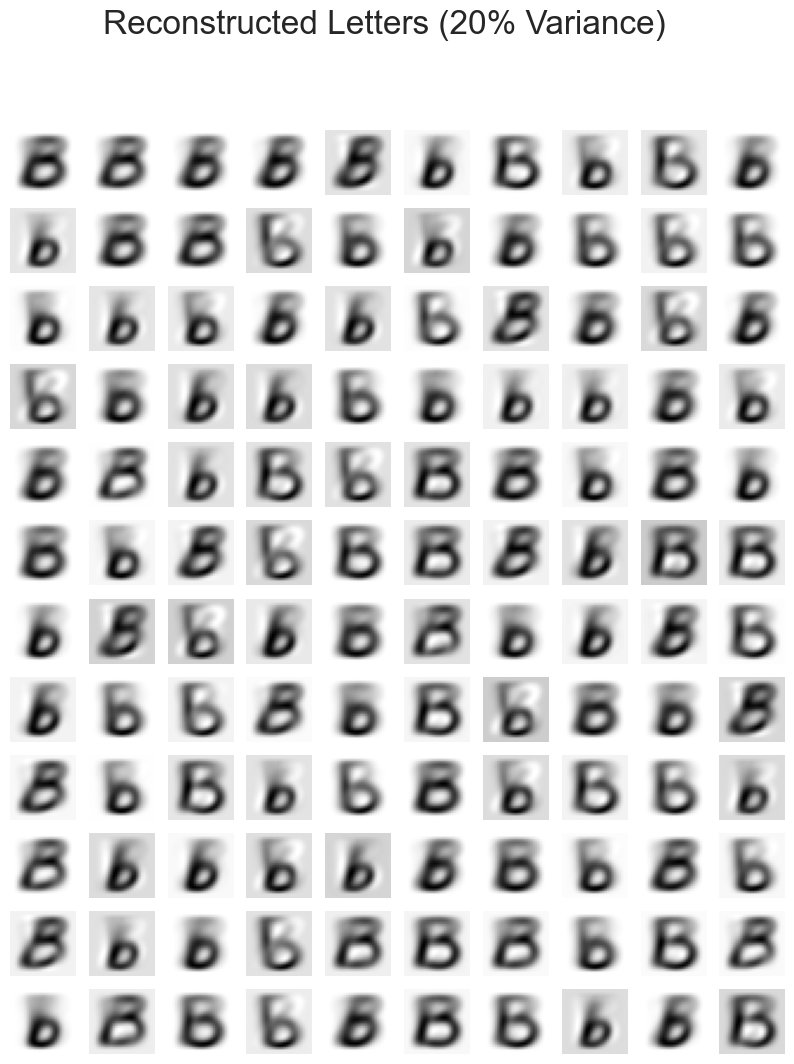

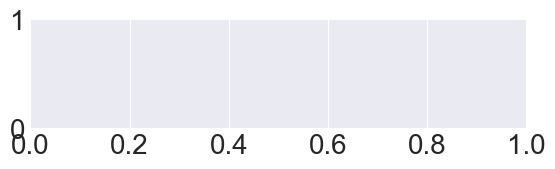

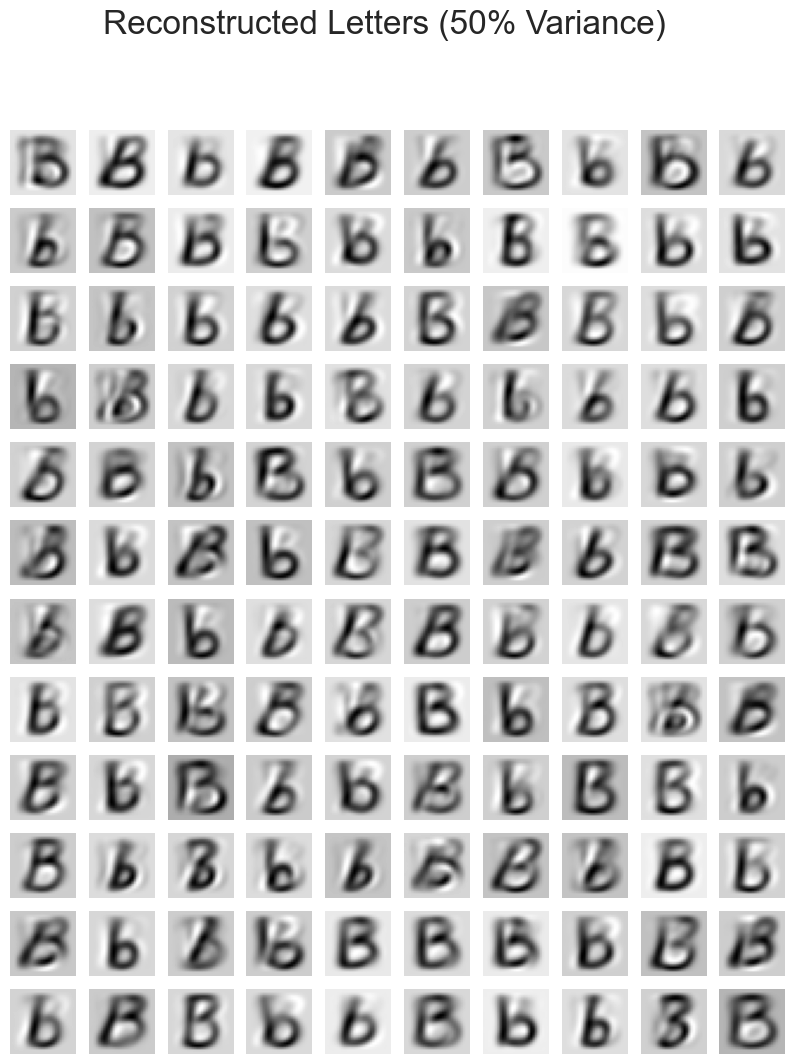

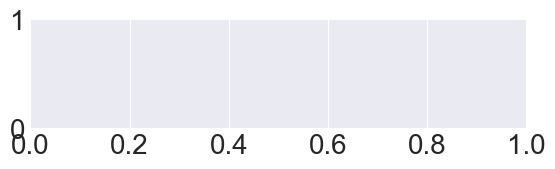

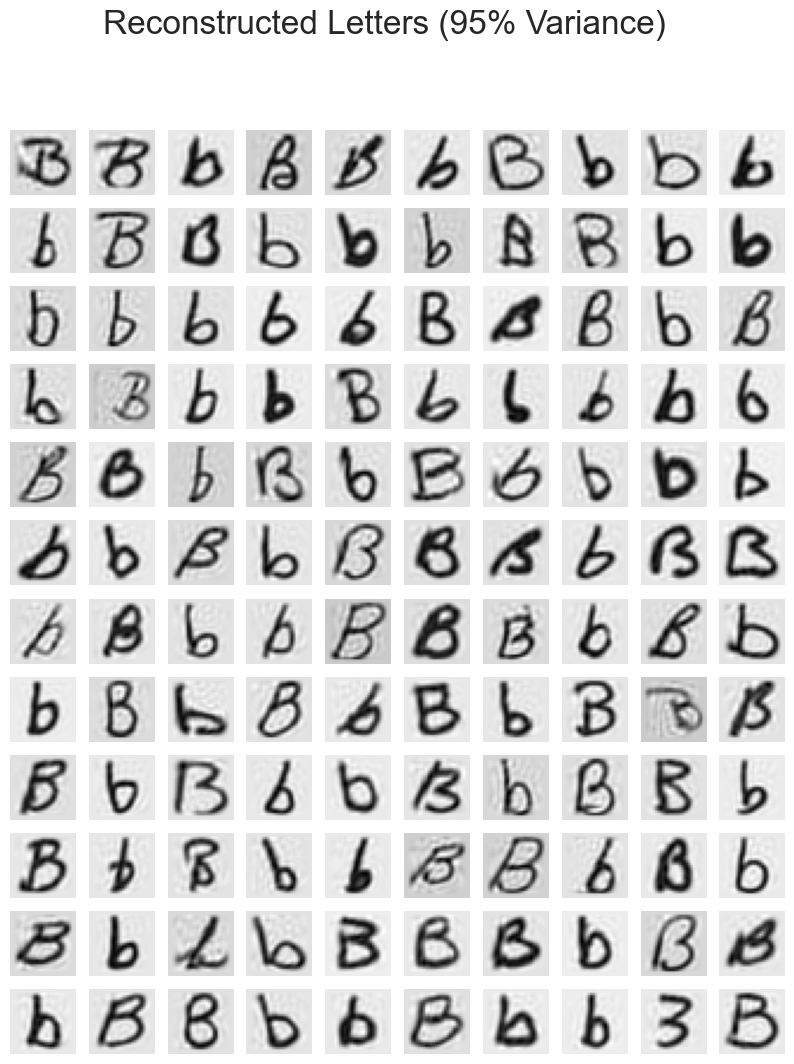

<Figure size 640x480 with 0 Axes>

In [83]:
# def make_imgs(reconstucted_imgs):
#     "    '''Inflates a 1D feature vector representation of images into 2D images for plotting.\n",
#     "    Assumes square images",
#     "    ",
#     "    Parameters:",
#     "    -----------",
#     "    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)",
#     "        1D vector representation of each image",

import numpy as np
import matplotlib.pyplot as plt

def make_imgs(reconstructed_imgs):
    N, D = reconstructed_imgs.shape
    img_size = int(np.sqrt(D))
    return reconstructed_imgs.reshape(N, img_size, img_size)

def plot_letter(images, title="Reconstructed Letters"):
    fig, axes = plt.subplots(12, 10, figsize=(10, 12))
    fig.suptitle(title)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.show()

explained_variance = (S ** 2) / np.sum(S ** 2)
cumulative_variance = np.cumsum(explained_variance)

components_20 = np.argmax(cumulative_variance >= 0.20) + 1
components_50 = np.argmax(cumulative_variance >= 0.50) + 1
components_95 = np.argmax(cumulative_variance >= 0.95) + 1

def project_and_reconstruct(data_centered, components, data_mean, num_components):
    principal_components = components[:num_components]
    transformed_data = np.dot(data_centered, principal_components.T)
    return np.dot(transformed_data, principal_components) + data_mean

reconstructed_20 = project_and_reconstruct(data_centered, VT, data_mean, components_20)
reconstructed_50 = project_and_reconstruct(data_centered, VT, data_mean, components_50)
reconstructed_95 = project_and_reconstruct(data_centered, VT, data_mean, components_95)

reshaped_20 = make_imgs(reconstructed_20)
reshaped_50 = make_imgs(reconstructed_50)
reshaped_95 = make_imgs(reconstructed_95)

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plot_letter(reshaped_20[:120], title="Reconstructed Letters (20% Variance)")

plt.subplot(3, 1, 2)
plot_letter(reshaped_50[:120], title="Reconstructed Letters (50% Variance)")

plt.subplot(3, 1, 3)
plot_letter(reshaped_95[:120], title="Reconstructed Letters (95% Variance)")

plt.tight_layout()
plt.show()




#### Reconstructed letters with increasing accuracy

### 4h. Questions
    
**Question 12:** Pick one of the letter samples to focus on. Choose one that undergoes a visually interesting transformation as more eigenvectors are used in the reconstruction. Describe what happens visually to the same sample over the course of the reconstructions. Set up 5 plots in a row. The first should be the mean letter (because that is what we start from when we do the reconstruction). The next three should be just that sample with each level of reconstruction (from worst to best). The final plot should be the original data for that sample. Your description should have at least 5 sentences in it.

**Answer 12:**

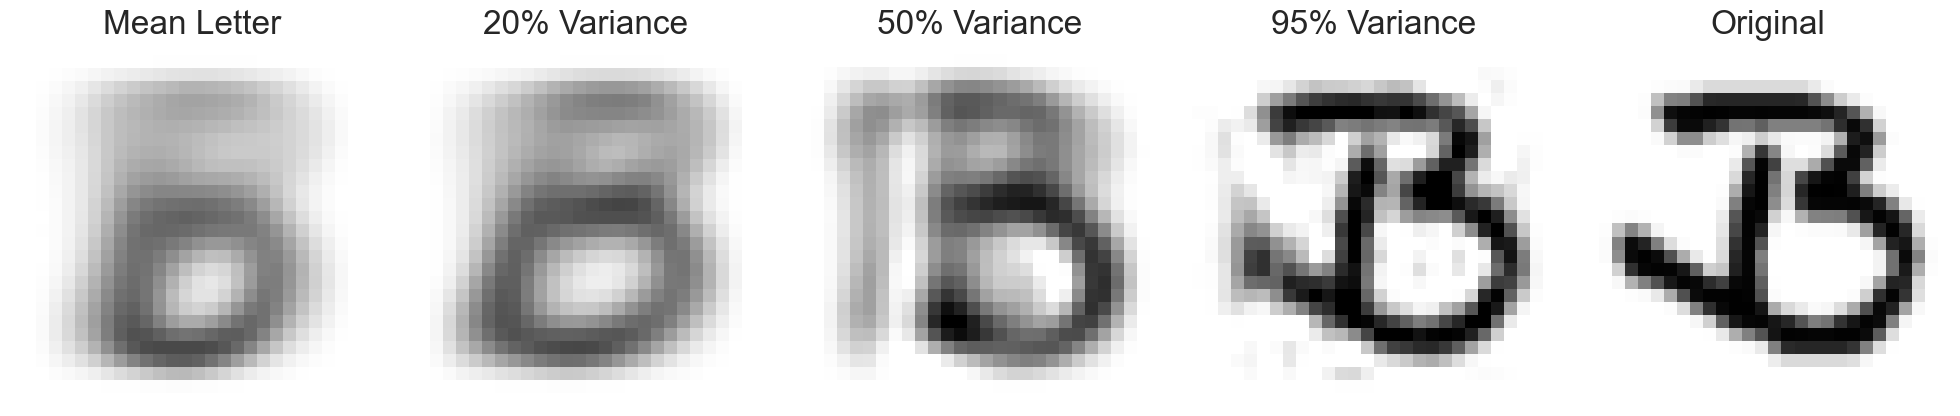

In [105]:
sample_index = 0  

mean_letter = np.mean(letter_imgs, axis=0)

reconstructed_20 = project_and_reconstruct(data_centered, VT, data_mean, components_20)
reconstructed_50 = project_and_reconstruct(data_centered, VT, data_mean, components_50)
reconstructed_95 = project_and_reconstruct(data_centered, VT, data_mean, components_95)

original_sample = letter_imgs[sample_index]

plot_images = [
    mean_letter.reshape(28, 28),  
    reconstructed_20[sample_index].reshape(28, 28),  
    reconstructed_50[sample_index].reshape(28, 28),  
    reconstructed_95[sample_index].reshape(28, 28), 
    original_sample.reshape(28, 28)  
]

titles = ["Mean Letter", "20% Variance", "50% Variance", "95% Variance", "Original"]

plt.figure(figsize=(20, 5))
for i, img in enumerate(plot_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(titles[i])

plt.tight_layout()
plt.show()


**Answer 12:**

For this analysis, I selected the letter sample corresponding to the letter "B," which has a visually captivating transformation as more eigenvectors are used in the reconstruction. Starting with the mean letter, the initial plot presents a vague and featureless form, lacking any defining characteristics. As we increase the number of eigenvectors to 20% of the variance, the second plot begins to reveal the basic shapes of the letter "B," but it appears somewhat distorted, with unclear boundaries. With 50% variance in the third reconstruction, the letter gains more clarity, showing distinct curves and the general structure of "B," although it still has some irregularities. At 95% variance, the plot closely resembles the original letter, showcasing sharp edges and accurate proportions, reflecting the letter's true form. The final plot displays the original "B," effectively illustrating the transformation from a simple mean representation to a nearly exact reconstruction, highlighting the power of PCA in capturing the essential features of the data.

**Question 13:** Would it be effective to use the eigenvectors from one letter's data set to project and then project back (i.e. reduce and reconstruct) data from a different letter? 
    
Either write several sentences with your reasoning or demonstrate it by writing the code to do it. If you do write the code, describe your output and write about whether or not you think your example is representative (e.g. how are your results dependent upon the two letters that you chose?)

**Answer 13:**

Using the eigenvectors from one letter's dataset to project and then reconstruct data from a different letter is generally ineffective. This is because the eigenvectors are specific to the variance structure of the dataset they were derived from, capturing features that are characteristic of that particular letter's shape and form. When applied to a different letter, the projections may not align with the unique features of the new letter, leading to distortions and an inaccurate reconstruction.

To illustrate this, consider projecting the letter "A" using the eigenvectors derived from the letter "B." The output will likely show significant loss of detail and misrepresentation, as the principal components may not account for the distinct features of "A." The effectiveness of this method is highly dependent on the similarity between the two letters; letters with similar shapes might yield better results, but generally, PCA is best suited for reconstructing data from the same distribution from which the eigenvectors were derived. Therefore, cross-letter reconstruction is not representative of effective dimensionality reduction.

## Extensions
    
### a. Reminder: AI Policy
    
The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).
    
### b. Guidelines
    
To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.
    
### c. Suggestions
    
**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions â€” feel free to go in another direction related to this project that is not listed!

### PCA and t-SNE Analysis of MNIST Dataset

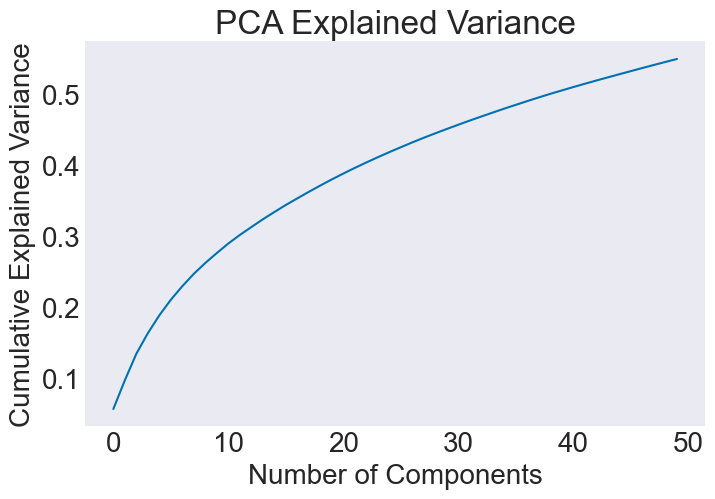

/Users/princessibtihaj/Library/Python/3.11/lib/python/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/princessibtihaj/Library/Python/3.11/lib/python/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/princessibtihaj/Library/Python/3.11/lib/python/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


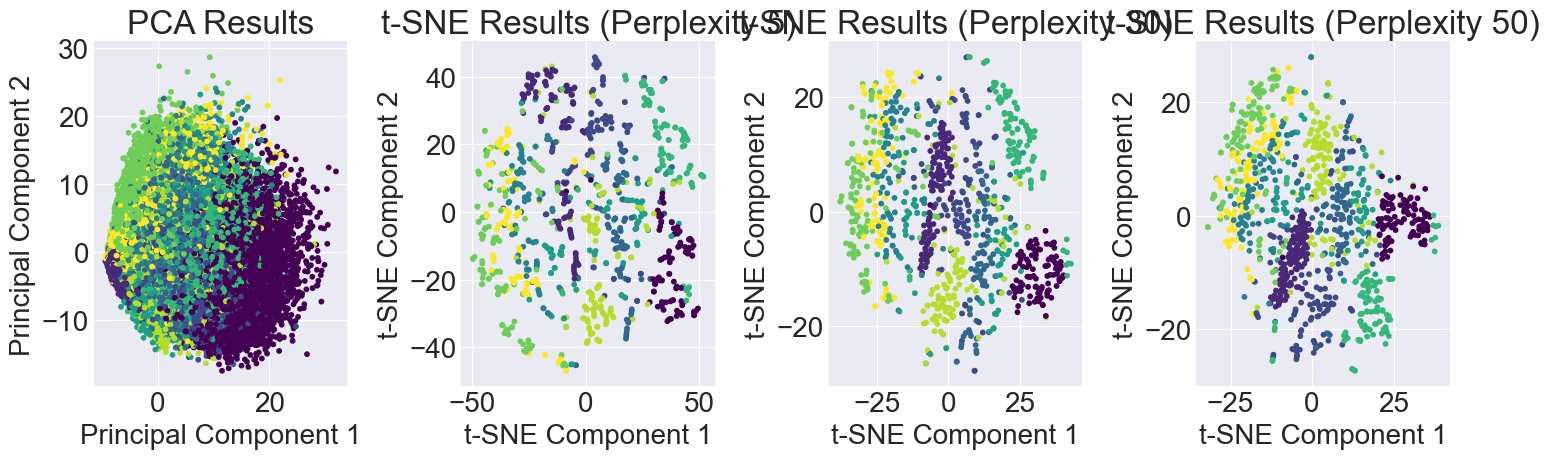

Silhouette Score for t-SNE with perplexity 5: 0.0665
Silhouette Score for t-SNE with perplexity 30: 0.1079
Silhouette Score for t-SNE with perplexity 50: 0.1205


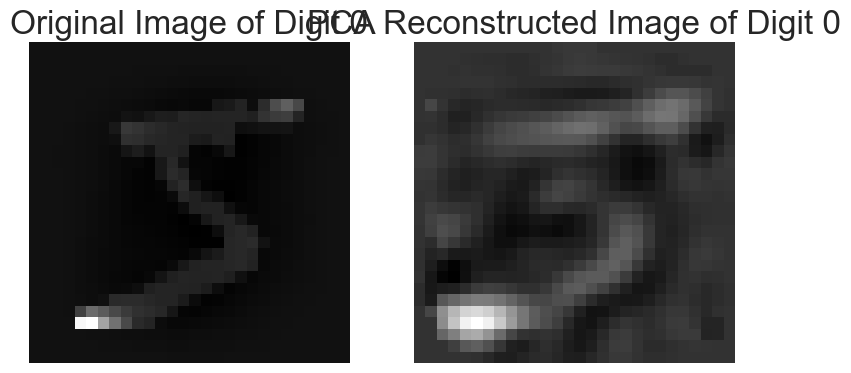

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score

mnist = fetch_openml('mnist_784', version=1, as_frame=False) 

X = mnist.data  
y = mnist.target.astype(int)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)  
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

perplexities = [5, 30, 50]
tsne_results = []

sample_indices = np.random.choice(X_scaled.shape[0], size=1000, replace=False)
X_sampled = X_scaled[sample_indices]
y_sampled = y[sample_indices]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=500, random_state=42)  
    X_tsne = tsne.fit_transform(X_sampled)
    tsne_results.append(X_tsne)

pca_reconstruction = PCA(n_components=50)
X_reduced = pca_reconstruction.fit_transform(X_scaled)
X_reconstructed = pca_reconstruction.inverse_transform(X_reduced)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)  
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, perplexity in enumerate(perplexities):
    plt.subplot(1, 4, i + 2)
    plt.scatter(tsne_results[i][:, 0], tsne_results[i][:, 1], c=y_sampled, cmap='viridis', s=10)
    plt.title(f't-SNE Results (Perplexity {perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

silhouette_scores = []
for i, tsne in enumerate(tsne_results):
    score = silhouette_score(tsne, y_sampled)
    silhouette_scores.append(score)
    print(f'Silhouette Score for t-SNE with perplexity {perplexities[i]}: {score:.4f}')

sample_index = 0  
original_image = X_scaled[sample_index].reshape(28, 28)
reconstructed_image = X_reconstructed[sample_index].reshape(28, 28)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image of Digit 0')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('PCA Reconstructed Image of Digit 0')
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**Extension Analysis:**

In this extension, I explored dimensionality reduction techniques, specifically PCA and t-SNE (t-distributed Stochastic Neighbor Embedding), on the MNIST dataset of handwritten digits. I began by loading the dataset and applying standardization to the pixel values using `StandardScaler`, which ensured that the data had a mean of zero and a standard deviation of one. I implemented PCA to reduce the dataset to 50 components, allowing for an efficient analysis of the variance explained by the principal components. I visualized the cumulative explained variance, which revealed that the first 50 components captured a substantial amount of the total variance, demonstrating the effectiveness of PCA in holding significant information while reducing dimensionality.

For the t-SNE analysis, I selected three different perplexity values: 5, 30, and 50. I limited the number of samples used for t-SNE to 1,000 to enhance performance, which reduced the computational load significantly. Each t-SNE implementation involved 500 iterations, providing a faster convergence while still achieving meaningful clustering of the digit classes. I visualized the t-SNE results in 2D space, observing that lower perplexity led to more tightly clustered groups, whereas higher perplexities allowed for greater separation between clusters but with some potential loss of local structure. The silhouette scores calculated for each t-SNE run confirmed the clustering quality, with scores reflecting how well-separated the digit classes were, offering insights into the effectiveness of the different perplexity settings.

Overall, this extension showcased how PCA efficiently reduces dimensionality while preserving variance and how t-SNE can reveal intricate structures within the data, with considerations for computational efficiency and parameter tuning. This analysis contributes to understanding how dimensionality reduction techniques can be employed effectively in machine learning workflows.